In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [10]:
gold_data = pd.read_csv('C:\\Users\\Siddhartha Anand\\Desktop\\Gold Price Prediction\\gld_price_data.csv')

In [11]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.shape

(2290, 6)

In [14]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
gold_data['Date'] = pd.to_datetime(gold_data['Date']) 

# Calculate correlations, excluding non-numeric columns
correlation = gold_data.corr(numeric_only=True) 


<Axes: >

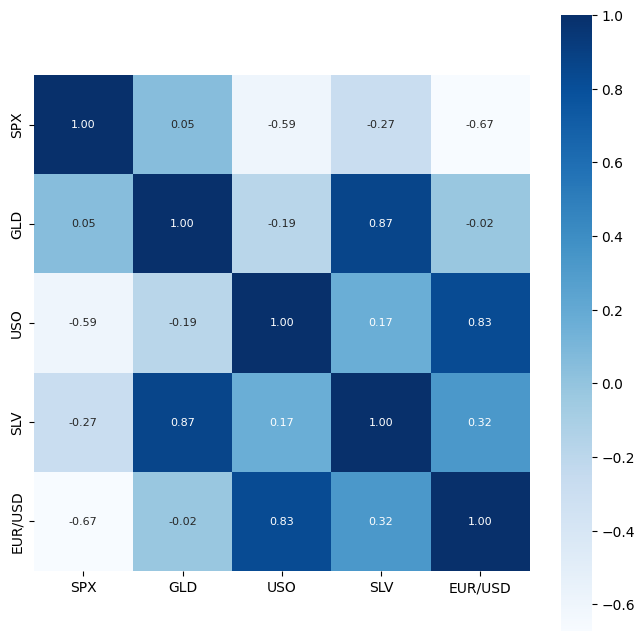

In [21]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation,cbar=True, square= True , fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [22]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [23]:
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


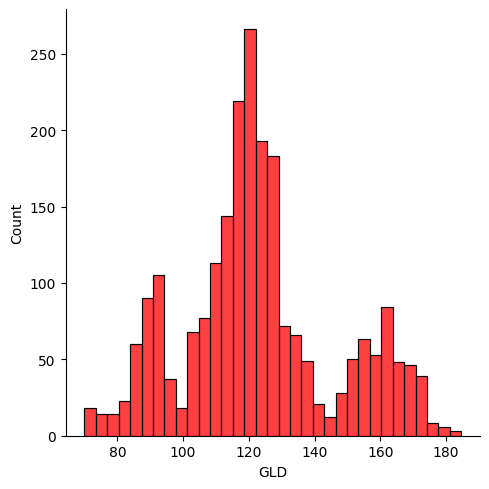

In [24]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color = 'red') 

Splitting the features and target

In [25]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into tranining data and testing data

In [28]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
test_data_prediciton = regressor.predict(X_test)

In [32]:
print(test_data_prediciton)

[168.73919985  82.00689985 115.8973003  127.66080061 120.76190183
 154.51249782 150.27689816 126.18690025 117.44859889 126.02780062
 116.56760117 172.11870104 141.74699911 167.51809886 115.2415998
 117.75190075 139.79040316 170.15470128 159.64220268 160.05769964
 155.12130013 125.13289964 175.73240001 157.11620319 125.14800048
  93.91149975  77.45690009 120.67250002 119.1043995  167.45369914
  88.23830059 125.42919983  91.13490057 117.66960021 121.04349923
 137.55420113 115.50060111 115.18950077 146.70469882 107.16720105
 104.27220234  87.21039773 126.56350065 117.97999964 153.38359911
 119.61170025 108.27989952 108.0174983   93.15010033 127.18429762
  74.45320049 113.64749931 121.33720027 111.35539918 118.85999871
 120.32139913 159.83089992 168.1567015  146.89879715  85.49689803
  94.2736003   86.65839901  90.60820002 118.91800112 126.44160063
 127.48609981 168.90900012 122.27689918 117.44649919  98.49610028
 167.73710014 143.04639808 132.12710249 121.14540207 121.21169939
 119.535300

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediciton)
print("R Squared error: ", error_score)

R Squared error:  0.9891585898891704


compare actual values and predicted values 

In [34]:
Y_test = list(Y_test)

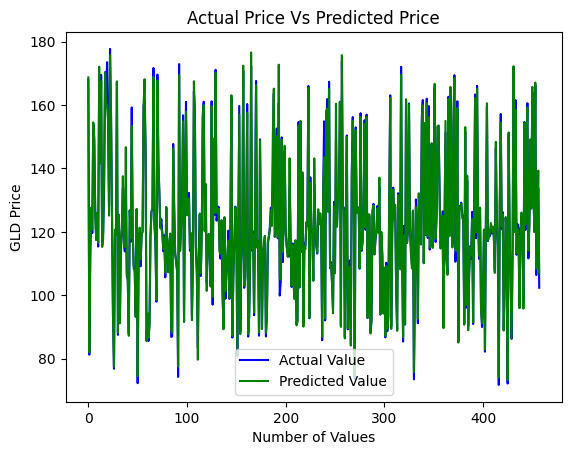

In [35]:
plt.plot(Y_test, color = 'blue' , label = 'Actual Value')
plt.plot(test_data_prediciton, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()